In [1]:
import os
import copy
import pickle
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import bootstrap

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import palettable


from astropy.utils.console import ProgressBar
from astropy.table import QTable
plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 28})

In [2]:
data_dir="/Users/xushuo/work/Submit/Simulation/data/"
fig_dir="/Users/xushuo/work/Papers/Simulation/Figure/"

In [3]:
with open(data_dir+"galaxies_tng300_072_new_slope_reff_aperture_1.txt",'rb') as f: 
    slope_aper_tab=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_slope_reff_outskirt_1.txt",'rb') as f: 
    slope_out_tab=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_reff_bootstrap_scatter_aperture.txt",'rb') as f: 
    scatter_aper_tab=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_reff_bootstrap_scatter_outskirt.txt",'rb') as f: 
    scatter_out_tab=pickle.load(f)

In [4]:
with open(data_dir+"galaxies_tng300_072_new_mock_reff_slope_aperture_1.txt",'rb') as f: 
    slope_aper_tab1=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_mock_reff_slope_outskirt_1.txt",'rb') as f: 
    slope_out_tab1=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_mock_reff_scatter_aperture_1.txt",'rb') as f: 
    scatter_aper_tab1=pickle.load(f)
with open(data_dir+"galaxies_tng300_072_new_mock_reff_scatter_outskirt_1.txt",'rb') as f: 
    scatter_out_tab1=pickle.load(f)

In [5]:
color_list=['steelblue','orangered','darkgrey']

In [6]:
with open(data_dir+"galaxies_tng300_072_aperture_1.txt",'rb') as f: 
    tab=pickle.load(f)

In [7]:
sma_list=np.asarray([1,2,3,4,5,8,10])
mass_bin=np.arange(11.2,12.5,0.1)
apersize=[]
outer=[]
for i in sma_list:
    apersize.append(i)
for j in sma_list[:-2:]:
    outer.append(j)

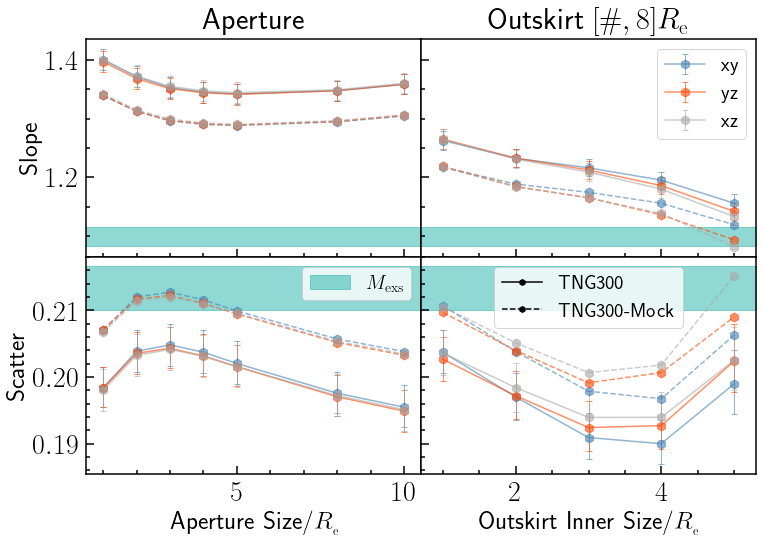

In [11]:
fig=plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2,2, hspace=0, wspace=0)
(ax1,ax2),(ax3,ax4) = gs.subplots(sharex='col', sharey='row')
projlist=['xy','yz','xz']
color_list=['steelblue','orangered','darkgrey']
for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    ax1.errorbar(apersize,slope_aper_tab['slope_aper_gal_'+proj],yerr=slope_aper_tab['slope_aper_gal_'+proj+'_err'],color=col, alpha=0.6, fmt='h-',
            capsize=3, capthick=1, elinewidth=1, markersize=9,label=proj+'_Origin')
    err1=scatter_aper_tab['scatter_aper_gal_'+proj]-scatter_aper_tab['scatter_aper_gal_'+proj+'_err1']
    err2=scatter_aper_tab['scatter_aper_gal_'+proj+'_err2']-scatter_aper_tab['scatter_aper_gal_'+proj]
    ax3.errorbar(apersize,scatter_aper_tab['scatter_aper_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.6, 
             capsize=3, capthick=1, elinewidth=1,fmt='h-',markersize=9)
    ax2.errorbar(outer,slope_out_tab['slope_out_gal_'+proj],yerr=slope_out_tab['slope_out_gal_'+proj+'_err'],color=col, alpha=0.6, fmt='h-',
            capsize=3, capthick=1, elinewidth=1, markersize=9,label=proj)
    err1=scatter_out_tab['scatter_out_gal_'+proj]-scatter_out_tab['scatter_out_gal_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_gal_'+proj+'_err2']-scatter_out_tab['scatter_out_gal_'+proj]
    ax4.errorbar(outer,scatter_out_tab['scatter_out_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.6, 
             capsize=3, capthick=1, elinewidth=1,fmt='h-',markersize=9)

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    ax1.errorbar(apersize,slope_aper_tab1['slope_aper_gal_'+proj],color=col, alpha=0.6, fmt='h--', 
                 markersize=9,label=proj+'_Mock')
    ax3.errorbar(apersize,scatter_aper_tab1['scatter_aper_gal_'+proj],color=col, alpha=0.6, 
             fmt='h--',markersize=9)
    ax2.errorbar(outer,slope_out_tab1['slope_out_gal_'+proj],color=col, alpha=0.6, fmt='h--',
             markersize=9)
    ax4.errorbar(outer,scatter_out_tab1['scatter_out_gal_'+proj],color=col, alpha=0.6, 
             fmt='h--',markersize=9)
    

ax4.errorbar((10,20),(0.2,0.2),color='black',fmt='h-',label='TNG300')
ax4.errorbar((10,20),(0.2,0.2),color='black',fmt='h--',label='TNG300-Mock')

x1=np.arange(0,13,2)
x2=np.arange(0,7,1)
y1=slope_exs_tab['xy']+slope_exs_err['xy']+0*x1
y2=slope_exs_tab['xy']-slope_exs_err['xy']+0*x1
y3=scatter_exs_err1['xy']+0*x1
y4=scatter_exs_err2['xy']+0*x1
c0='lightseagreen'
ax1.fill_between(x1,y1,y2,alpha=0.5,color=c0)   
ax2.fill_between(x2,y1,y2,alpha=0.5,color=c0)
ax3.fill_between(x1,y3,y4,alpha=0.5,color=c0,label=r'$M_{\rm exs}$')   
ax4.fill_between(x2,y3,y4,alpha=0.5,color=c0)
    
ax1.set_xlim(0.5,10.5)
ax2.set_xlim(0.7,5.3)
ax1.set_title('Aperture',fontsize=30)
ax3.set_xlabel(r'Aperture Size/$R_{\rm_e}$',fontsize=25)
ax1.set_ylabel('Slope',fontsize=25)
ax3.set_ylabel('Scatter',fontsize=25)
ax2.set_title(r'Outskirt $[\#,8]R_{\rm e}$',fontsize=30)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)
ax4.legend(fontsize=20)
_= ax4.set_xlabel(r'Outskirt Inner Size/$R_{\rm_e}$',fontsize=25)
plt.savefig(fig_dir+"FigB1.png",dpi=500)

In [9]:
def linear1d(x,a,b):
    return a*x+b

In [10]:
slope_ins_tab={}
slope_ins_err={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    ydata=np.log10(tab['mass_halo'][mask])
    xdata=np.log10(tab['mass_stellar_ins'][mask])
    popt,pcov=curve_fit(linear1d,xdata,ydata)
    slope_ins_tab[proj]=popt[0]
    slope_ins_err[proj]=np.sqrt(pcov[0,0])
slope_exs_tab={}
slope_exs_err={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    ydata=np.log10(tab['mass_halo'][mask])
    xdata=np.log10(tab['mass_stellar_exs'][mask])
    popt,pcov=curve_fit(linear1d,xdata,ydata)
    slope_exs_tab[proj]=popt[0]
    slope_exs_err[proj]=np.sqrt(pcov[0,0])
scatter_ins_tab={}
scatter_ins_err1={}
scatter_ins_err2={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    std=np.std(np.log10(tab['mass_halo'][mask])-slope_ins_tab[proj]*np.log10(tab['mass_stellar_ins'][mask]),ddof=1)
    data=np.log10(tab['mass_halo'][mask])-slope_ins_tab[proj]*np.log10(tab['mass_stellar_ins'][mask])
    err=bootstrap((data,),np.std,n_resamples=8000,confidence_level=0.7)
    scatter_ins_err1[proj]=err.confidence_interval[0]
    scatter_ins_err2[proj]=err.confidence_interval[1]
    scatter_ins_tab[proj]=std
scatter_exs_tab={}
scatter_exs_err1={}
scatter_exs_err2={}
for proj in ('xy','yz','xz'):
    mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
    std=np.std(np.log10(tab['mass_halo'][mask])-slope_exs_tab[proj]*np.log10(tab['mass_stellar_exs'][mask]),ddof=1)
    data=np.log10(tab['mass_halo'][mask])-slope_exs_tab[proj]*np.log10(tab['mass_stellar_exs'][mask])
    err=bootstrap((data,),np.std,n_resamples=8000,confidence_level=0.7)
    scatter_exs_err1[proj]=err.confidence_interval[0]
    scatter_exs_err2[proj]=err.confidence_interval[1]
    scatter_exs_tab[proj]=std